
# 主題二 :
# GAN 的原理基礎：解析 Cross Entropy 與 KL-Divergence



## <font color='lightsalmon'>1.1 介紹生成對抗網路 </font>
"GAN" 全名為 Generative Adversarial Network 是一種用來生成圖片、音樂等類似真實數據的AI 模型。

主要由兩個互相對抗的神經網絡組成：
- ### <font color='skyblue'>生成器 $G$ (Generator)</font>
它負責從雜訊 $Z$ 中生成假的數據 $G(z)$，試圖讓它們看起來像真的一樣。
- ### <font color='skyblue'>判別器 $D$ (Discriminator)</font>
負責區分數據，分別為來自真實分佈 $p_{data}(x)$ 和來自 $G$ 產生的分佈 $p_G(x)$。

<font color='lavender'>其中，判定結果以 $0 \sim 1$ 之間來量化。</font>

<font color='lavender'>因此，以生成器 $G$ 的角度，會希望 $D[G(z)]$ 接近 $1$，表示成功騙過了判別器 $D$。</font>

<font color='lavender'>相反的，對判別器 $D$ 而言，它會希望 $D[G(z)]$ 接近 $0$ 且 $D(x)$ 接近 $1$，表示成功辨識資料的真假。</font>

## <font color='lightsalmon'>1.2 GAN 的數學原理</font>
總而言之，GAN 的目標是讓生成器 $G$ 產出的數據分佈 $p_G(x)$ 盡可能接近真實數據分佈 $p_{data}(x)$。

它的核心就是一個對抗損失函數，如下式：

$$\min_G \max_D \;V(G, D) = \mathbb{E}_{x \sim p_{\text{data}}\left(x\right)} \left[\log D(x)\right] + \mathbb{E}_{z \sim p_z(z)} \left[\log (1 - D(G(z)))\right]$$

其中

- <font color='bisque'>$\mathbb{E}_{x \sim p_{\text{data}}\left(x\right)} \left[\log D(x)\right]$</font> 為給判別器 $D$ 的目標，使其盡可能對於真實數據給予較高且接近 $1$ 的機率。


- <font color='mistyrose'>$\mathbb{E}_{z \sim p_z(z)} \left[\log (1 - D(G(z)))\right]$</font> 則為讓判別器對於 $G$ 產生的假數據給予較低且接近 $0$ 的機率。

### 結論：
<font color='powderblue'>判別器 $D$ 的目的就是要最大化這個損失函數，讓真實資料與假資料能給正確的被區分出來。
而生成器 $G$ 則反過來，目的是要最小化此公式，使判別器無法分辨出資料的真偽。最後，透過兩者之間的拉扯，當達到平衡後，生成器就能夠產生與真實數據近乎一樣的成果了</font>


<h>

<hr><hr>

## <font color='lightgreen'>2.1 Cross Entropy 簡介</font>
交叉熵 Cross Entorpy 作用是衡量衡量兩個機率分佈之間的差異。而在像是 GAN 這種判斷真假的二元分類問題中，我們知道真實資料 $x$ 以 $1$ 表示，$0$ 表示生成器的假數據，並假設模型預測的為 $1$ 的機率為 $p$。
以此設定，Cross Entropy 定義如下：

$$L = - \mathbb{E} \left[x \log p + (1-x) \log (1-p) \right]$$

也就是說：
- 當 $x=1$，損失為 $-\log p$，且我們希望 $p$ 越接近 $1$ 越好。
- 當 $x=0$，損失為 $-\log (1-p)$， 且反之希望 $p$ 越接近 $0$ 越好。


## <font color='lightgreen'>2.2 Cross Entropy 與 GAN 的關係</font>
因此，我們可以將 GAN 的對抗損失函數拆解成 $D$ 與 $G$ 各自的損失。
- ### <font color='skyblue'>判別器 $D$ 損失：</font>
$$L_D = -\mathbb{E}_{x \sim p_{\text{data}}\left(x\right)} \left[log D(x)\right] - \mathbb{E}_{z \sim p_z(z)} \left[log (1 - D(G(z)))\right]$$

這與 Cross Entropy 的形式一致，代表對於真實數據 $x \sim p_{\text{data}}\left(x\right)$ ，判別器希望讓 $D(x)$ 越接近 $1$，也就是 $\log D(x)$ 盡可能大一些。

- ### <font color='skyblue'>生成器 $G$ 損失：</font>
$$L_G = - \mathbb{E}_{z \sim p_z(z)} \left[log D(G(z))\right]$$

對於生成器產生的 $G(z)$ 而言，它會希望 $D(G(z))$ 越接近 $0$ 越好，也就是 $log(1−D(G(z)))$ 盡可能大來成功騙過判別器。

<hr><hr>

## <font color='plum'>3.1 KL-Divergence 簡介</font>
首先，定義來自真實數據的資料分佈 $P(x)$ 以及另一個分佈 $Q(x)$, KL-Divergence 即為兩者之間非對稱之差異性衡量，公式如下：

$$D_{KL}\left(P||Q\right) = \sum_x P(x) log \dfrac{P(x)}{Q(x)}$$

其中，當 $P(x)$ 與 $Q(x)$ 越接近時，KL-Divergence 越小。且當兩者之間分佈
沒有重疊時，KL-Divergence 可能變得無限大。


## <font color='plum'>3.2 KL-Divergence 與 Cross Entropy 的關係</font>
當我們展開 KL-Divergence 的公式：

$$D_{KL}\left(P||Q\right) = \mathbb{E}_{x \sim P} \left[log P(x) - log Q(x) \right]$$

而我們知道當 $P$ 為機率分佈，它的 Entropy 的定義為：

$$H(X) = -\mathbb{E}_{x \sim P} \left[log P(x)\right] = -\sum_{x \sim P} P(x) log P(x)$$

因為我們要比較的是以 $Q$ 去近似 $P$，所以說當兩者之間有共同事件但是有不同對應的機率時，$P$ 與 $Q$ Cross Entorpy 如下。其中 $n$ 為事件數。

$$H(P,Q) = - \sum_i^n p_i\;log(q_i)$$

所以最後兩者之間的 KL-Divergence 可以改寫為：

$$D_{KL}\left(P||Q\right) = H(P,Q) -H(P)$$

### 結論：
<font color='powderblue'>最小化 Cross Entropy $H(P,Q)$，也相當於最小化 KL-Divergenc。</font>


## <font color='plum'>3.3 KL-Divergence 與 GAN 的關係</font>
對於 GAN 而言，不能夠項最小化 Cross Entropy 一樣最小化 KL-Divergence。
因為
- KL-Divergence 的非對稱性
- 當 $P(x)=Q(x)$ 時，KL-Divergence 為 0
- 如果 $P(x)$ 中包含的某些值在 $Q(x)$ 為 0，則 KL-Divergence 可能接近無限大。這可能會導致生成器產生許多模糊、不精確的樣本。

所以直接最小化 KL-Divergence 並不適合在 GAN 中使用。

## <font color='plum'>3.4 KL-Divergence 與 JS-Divergence 的關係</font>
因為 GAN 的核心是要讓 $G$ 產生的數據分佈 $p_G(x)$ 盡可能接近真實數據分佈 $p_{data}(x)$。而在衡量兩個機率分佈的相似度時，一般的 KL-Divergence 會導致上述問題，而 JS-Divergence 的引入則有效地改善了這些問題。

JS-Divergence 為 KL-Divergence 的變體，定義為：

$$D_{JS}\left(P||Q\right) = \dfrac{1}{2}\; D_{KL}\left(P||M\right) + \dfrac{1}{2} \;D_{KL}\left(Q||M\right)\;\;,\;\;M = \dfrac{1}{2}\;(P+Q)$$

利用這樣的設定，JS-Divergence 衡量的是 $P(x)$ 和 $Q(x)$ 各自與 $M(x)$ 之間的 KL-Divergence 的平均值。因此
- 改善了對稱性，衡量兩者之間的平均相似度
- 就算兩者之間無重疊部分，衡量結果終究是有限值。GAN 仍然能夠獲得有效梯度

<hr><hr>

## <font color='peachpuff'>4.1 損失函數-簡易程式實驗</font>
### 以下將設計一個實驗，用來驗證 Cross Entropy、KL-Divergence、JS-Divergence 在 GAN 訓練中的影響。

### <font color='wheat'>(1) 準備真實數據</font>
以下先匯入必要套件，包含用來建立 GAN 的 "Pytorch"

接著生成了一個常態分佈：$X \sim N \left(\mu = 2\;,\;\sigma^2 = {0.5}^2 \right)$，圖形如下表示。

其中又包含了 $10000$ 筆的樣本。

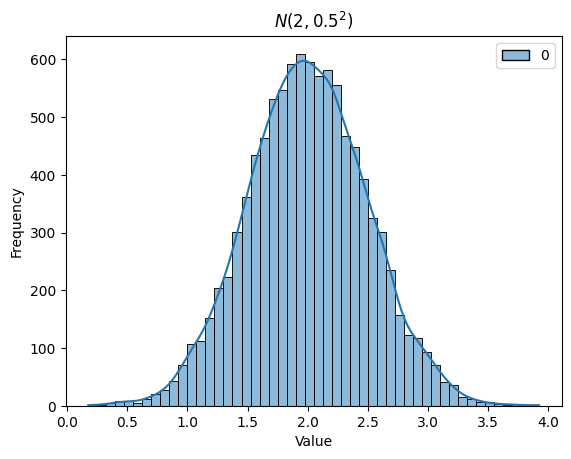

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def real_data_sample(batch_size):
    return torch.randn(batch_size, 1) * 0.5 + 2

samples = real_data_sample(10000).numpy()
sns.histplot(samples, bins=50, kde=True)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("$N(2, 0.5^2)$")
plt.show()

### <font color='wheat'>(2) 定義生成器 G 與判別器 D</font>
- #### 生成器 $G$
輸入一個隨機噪聲 $z$，會經過兩層線性變換和激活函數 "ReLU"，最後輸出一個一維數值，來對應真實數據 $x$ 目前設定的常態分佈。

- #### 判別器 $D$
作用是輸入一個一維數據。接著輸出一個機率值 $(0\sim1)$，代表這個數據是真實的機率。

In [5]:
class Generator(nn.Module):
    def __init__(self, noise_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

### <font color='wheat'>(3) 定義不同 Loss Functions</font>

在此我們定義了三種不同的損失函數，用來訓練 GAN。
- #### Cross Entropy Loss
- #### KL-Divergence Loss
- #### JS-Divergence Loss


In [6]:
def cross_entropy_loss(D_real, D_fake):
    loss_D = -torch.mean(torch.log(D_real) + torch.log(1 - D_fake))
    loss_G = -torch.mean(torch.log(D_fake))
    return loss_D, loss_G

def kl_divergence_loss(D_real, D_fake):
    loss_D = torch.mean(D_real * torch.log(D_real / (D_real + D_fake)))
    loss_G = torch.mean(torch.log(1 - D_fake))
    return loss_D, loss_G

def js_divergence_loss(D_real, D_fake):
    M = 0.5 * (D_real + D_fake)
    loss_D = 0.5 * (torch.mean(D_real * torch.log(D_real / M)) + torch.mean(D_fake * torch.log(D_fake / M)))
    loss_G = torch.mean(torch.log(1 - D_fake))
    return loss_D, loss_G

### <font color='wheat'>(4) 定義 GAN 的訓練函數</font>
在此我們訓練一個簡單的 GAN。建立並初始化生成器 $G$ 和判別器 $D$。
此處選用之 optimizer 為 "Adam"，且epoch 設定 1000 次輸出一次損失，來監控訓練狀況。

In [7]:
def train_gan(loss_fn, num_epochs=10000, batch_size=64, noise_dim=1, lr=0.01):
    G = Generator(noise_dim)
    D = Discriminator()

    optimizer_G = optim.Adam(G.parameters(), lr=lr)
    optimizer_D = optim.Adam(D.parameters(), lr=lr)

    for epoch in range(num_epochs):
        real_data = real_data_sample(batch_size)
        noise = torch.randn(batch_size, noise_dim)
        fake_data = G(noise)

        D_real = D(real_data)
        D_fake = D(fake_data.detach())

        loss_D, loss_G = loss_fn(D_real, D_fake)

        optimizer_D.zero_grad()
        loss_D.backward()
        optimizer_D.step()

        noise = torch.randn(batch_size, noise_dim)
        fake_data = G(noise)
        D_fake = D(fake_data)
        _, loss_G = loss_fn(D_real, D_fake)

        optimizer_G.zero_grad()
        loss_G.backward()
        optimizer_G.step()

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: Loss_D: {loss_D.item():.4f}, Loss_G: {loss_G.item():.4f}")

    return G

### <font color='wheat'>(5) 結果展示</font>
最後，觀察使用不同損失函數之下，GAN 的訓練情況：
- #### <font color='lightsteelblue'>Cross Entropy Loss :</font>
Loss_G 和 Loss_D 在訓練過程中相對穩定。沒有出現 "nan"，表示訓練沒有發散。因此 Cross Entropy 對於 GAN 來說通常較穩定，符合我們原先的預期。
- #### <font color='lightsteelblue'>KL-Divergence Loss :</font>
對於，KL-Divergence 來說，我們知道當 $P$ 與 $Q$ 之間分佈不重疊時，可能會導致 $log \dfrac{P(x)}{Q(x)}$，發散至 "nan"。因此 KL 在 GAN 訓練中不穩定，不適合作為主要損失函數
- #### <font color='lightsteelblue'>JS-Divergence Loss :</font>
在以下的結果中，
$Loss_D$ ≈ $0$ 可能代表判別器過強，使生成器無法有效強化自己。而
$Loss_G$ 非常負表示生成器的輸出與 $P$ 相差較遠。
總雃言之，我們的訓練結果顯示生成器還未能有效學習，可能需要調整學習率或其他超參數來使訓練更穩定。

In [8]:
print("Training with Cross Entropy Loss")
G_ce = train_gan(cross_entropy_loss)

print("Training with KL Divergence Loss")
G_kl = train_gan(kl_divergence_loss)

print("Training with JS Divergence Loss")
G_js = train_gan(js_divergence_loss)


Training with Cross Entropy Loss
Epoch 0: Loss_D: 1.1109, Loss_G: 0.8266
Epoch 1000: Loss_D: 1.3863, Loss_G: 0.6876
Epoch 2000: Loss_D: 1.3863, Loss_G: 0.6931
Epoch 3000: Loss_D: 1.3863, Loss_G: 0.6932
Epoch 4000: Loss_D: 1.3861, Loss_G: 0.6932
Epoch 5000: Loss_D: 1.3863, Loss_G: 0.6932
Epoch 6000: Loss_D: 1.3863, Loss_G: 0.6931
Epoch 7000: Loss_D: 1.3863, Loss_G: 0.6930
Epoch 8000: Loss_D: 1.3863, Loss_G: 0.6932
Epoch 9000: Loss_D: 1.3863, Loss_G: 0.6931
Training with KL Divergence Loss
Epoch 0: Loss_D: -0.3263, Loss_G: -0.6260
Epoch 1000: Loss_D: nan, Loss_G: nan
Epoch 2000: Loss_D: nan, Loss_G: nan
Epoch 3000: Loss_D: nan, Loss_G: nan
Epoch 4000: Loss_D: nan, Loss_G: nan
Epoch 5000: Loss_D: nan, Loss_G: nan
Epoch 6000: Loss_D: nan, Loss_G: nan
Epoch 7000: Loss_D: nan, Loss_G: nan
Epoch 8000: Loss_D: nan, Loss_G: nan
Epoch 9000: Loss_D: nan, Loss_G: nan
Training with JS Divergence Loss
Epoch 0: Loss_D: 0.0053, Loss_G: -0.7456
Epoch 1000: Loss_D: 0.0000, Loss_G: -0.8438
Epoch 2000: Lo